# Bivariate Analysis: Sales vs. External Factors

This notebook focuses on analyzing the relationship between sales and external factors like Price and SNAP events.

## Goals:
1.  **Sales vs. Price**: Analyze price elasticity.
2.  **Sales vs. SNAP**: Analyze the impact of food stamps.

In [1]:
import os
script_dir = os.getcwd()
FOLDER_PATH_DATA = os.path.join(script_dir, "..", "ETL Process", "final_optimized.parquet")
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")

# Connect to DuckDB
con = duckdb.connect()

## 1. Sales vs. Price (Elasticity)
We analyze the relationship between sales and price for a specific department (FOODS_3), using a 1% sample to avoid overplotting.

Analyzing Price Elasticity...


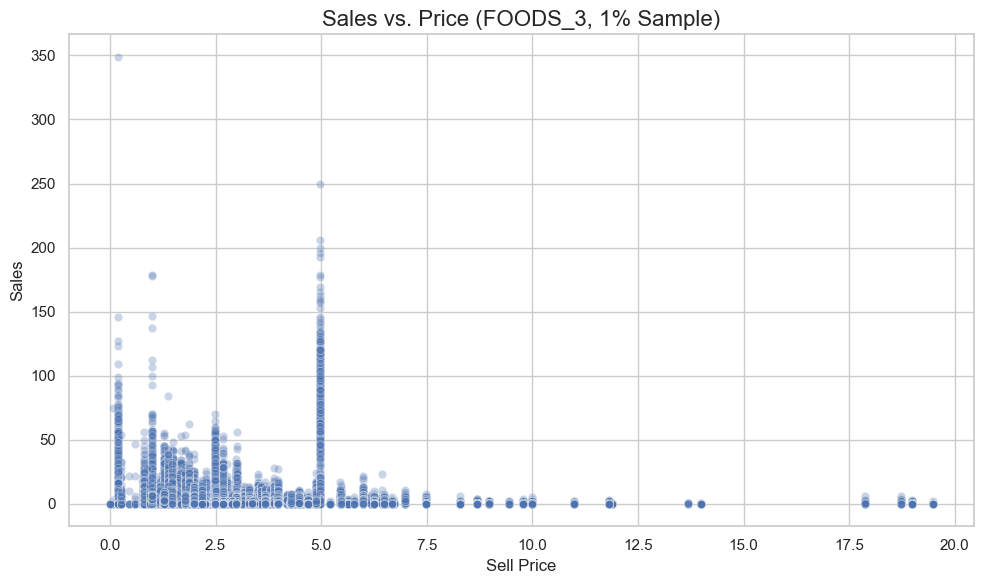

In [2]:
def analyze_price_elasticity(con):
    print("Analyzing Price Elasticity...")
    # Filter for FOODS_3 and sample 1%
    query = """
    SELECT 
        sell_price, 
        sales 
    FROM '""" + FOLDER_PATH_DATA + """' 
    WHERE dept_id = 'FOODS_3' 
    USING SAMPLE 1%
    """
    df = con.sql(query).df()
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='sell_price', y='sales', alpha=0.3)
    plt.title('Sales vs. Price (FOODS_3, 1% Sample)', fontsize=16)
    plt.xlabel('Sell Price', fontsize=12)
    plt.ylabel('Sales', fontsize=12)
    plt.tight_layout()
    plt.show()

analyze_price_elasticity(con)

## 2. Sales vs. SNAP (The Food Stamp Effect)
We compare average sales for SNAP vs. Non-SNAP days for FOODS category in CA.

Analyzing SNAP Effect...


C:\Users\DELL\AppData\Local\Temp\ipykernel_596\691031770.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='snap_CA', y='avg_sales', palette='Set2')


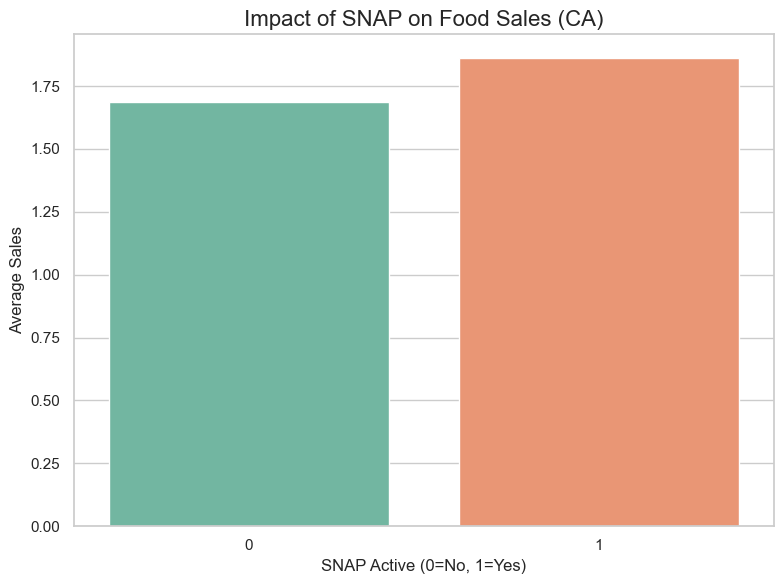

In [3]:
def analyze_snap_effect(con):
    print("Analyzing SNAP Effect...")
    query = """
    SELECT 
        snap_CA, 
        AVG(sales) as avg_sales 
    FROM '""" + FOLDER_PATH_DATA + """' 
    WHERE cat_id = 'FOODS' AND state_id = 'CA'
    GROUP BY snap_CA
    ORDER BY snap_CA
    """
    df = con.sql(query).df()
    
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df, x='snap_CA', y='avg_sales', palette='Set2')
    plt.title('Impact of SNAP on Food Sales (CA)', fontsize=16)
    plt.xlabel('SNAP Active (0=No, 1=Yes)', fontsize=12)
    plt.ylabel('Average Sales', fontsize=12)
    plt.tight_layout()
    plt.show()

analyze_snap_effect(con)